In [1]:
import pandas as pd
import sympy
from sympy import symbols

In [2]:
# dynamic system: taking exams
dynamic = {
    's_': ['fail', 'fail', 'passed', 'passed', 'fail', 'passed'],
    'r': [-3, -1, 1, 3, -2, 1],
    's': ['fail', 'fail', 'fail', 'passed', 'passed', 'passed'],
    'a': ['play', 'learn', 'learn', 'play', 'play', 'learn'],
    'P(s_, r|s, a)': ['1', '1-m', 'm', '1-n', 'n', '1'],
}
df = pd.DataFrame(data=dynamic)

# center the text
d = dict(selector="th",
       props=[('text-align', 'center')])
df.style.set_properties(**{'width':'10em', 'text-align':'center'})\
.set_table_styles([d])

,s_,r,s,a,"P(s_, r|s, a)"
0,fail,-3,fail,play,1
1,fail,-1,fail,learn,1-m
2,passed,1,fail,learn,m
3,passed,3,passed,play,1-n
4,fail,-2,passed,play,n
5,passed,1,passed,learn,1


In [3]:
# policy
policy = {
    's': ['fail', 'fail', 'passed', 'passed'],
    'a': ['play','learn', 'play', 'learn'],
    'pi(a|s)': ['1-x', 'x', 'y', '1-y'],
}
df2 = pd.DataFrame(data=policy)
df2.style.set_properties(**{'width':'10em', 'text-align':'center'})\
.set_table_styles([d])

,s,a,pi(a|s)
0,fail,play,1-x
1,fail,learn,x
2,passed,play,y
3,passed,learn,1-y


In [4]:
'''
Bellman Equation

v(fail) = pi(play|fail)*q(fail,play) + pi(learn|fail)*q(fail,learn)
        = (1-x)*q(fail,play) + x*q(fail,learn)
        
v(passed) = pi(play|passed)*q(passed,play) + pi(learn|passed)*q(passed,learn)
        = y*q(passed,play) + (1-y)*q(passed,learn)

q(fail,play) = P(fail,r|fail,play)[r + gamma*v(fail)] + P(passed,r|fail,play)[r + gamma*v(passed)]
             = 1*[-3 + gamma*v(fail)] + 0 
             = -3 + gamma*v(fail)
             
q(fail,learn) = P(fail,r|fail,learn)[r + gamma*v(fail)] + P(passed,r|fail,learn)[r + gamma*v(passed)]
              = (1-m)*[-1 + gamma*v(fail)] + m*[1 + gamma*v(passed)]
              
q(passed,play) = P(fail,r|passed,play)[r + gamma*v(fail)] + P(passed,r|passed,play)[r + gamma*v(passed)]
             = n*[-2 + gamma*v(fail)] + (1-n)*[3 + gamma*v(passed)]

q(passed,learn) = P(fail,r|passed,learn)[r + gamma*v(fail)] + P(pass,r|passed,learn)[r + gamma*v(passed)]
              = (1-m)*0 + m*[1 + gamma*v(pass)]
              = m[1 + gamma*v(pass)]
              
6 virables, 6 equations; m,n,gamma are parameters in (0,1)
'''

# automatically enable the best printer available in your environment.
sympy.init_printing()

# define variables and parameters
v_fail, v_passed = symbols('v_(fail) v_(passed)')
q_fail_play, q_fail_learn ,q_passed_play, q_passed_learn = \
symbols('q_(fail\,play) q_(fail\,learn) q_(passed\,play) q_(passed\,learn)')
m, n, gamma, x, y = symbols('m n gamma x y')

# define the augmented matrix
system = sympy.Matrix((
    (1, 0, x-1, -x, 0, 0, 0),
    (0, 1, 0, 0, -y, y-1, 0),
    (-gamma, 0, 1, 0, 0, 0, -3),
    ((m-1)*gamma, -m*gamma, 0, 1, 0, 0, 2*m-1),
    (-n*gamma, (n-1)*gamma, 0, 0, 1, 0, 3-5*n),
    (0, -m*gamma, 0, 0, 0, 1, m),
))

In [5]:
system

⎡    1          0      x - 1  -x  0     0       0   ⎤
⎢                                                   ⎥
⎢    0          1        0    0   -y  y - 1     0   ⎥
⎢                                                   ⎥
⎢   -γ          0        1    0   0     0      -3   ⎥
⎢                                                   ⎥
⎢γ⋅(m - 1)    -γ⋅m       0    1   0     0    2⋅m - 1⎥
⎢                                                   ⎥
⎢  -γ⋅n     γ⋅(n - 1)    0    0   1     0    3 - 5⋅n⎥
⎢                                                   ⎥
⎣    0        -γ⋅m       0    0   0     1       m   ⎦

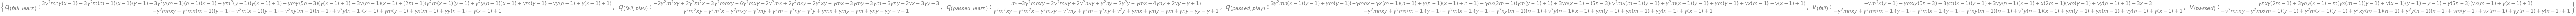

In [6]:
sympy.solve_linear_system(
    system, 
    v_fail, v_passed, 
    q_fail_play, q_fail_learn, q_passed_play, q_passed_learn
)